In [2]:
#%load_ext snakeviz

import sys
sys.path.insert(0,'../omphalos')

from context import omphalos

# Set seeds for repeatability.
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

# Import data processing modules.
import pandas as pd
import numpy as np

# Import machine learning modules.
import tensorflow as tf
from tensorflow import keras

import keras

from keras import layers
from keras import optimizers
from keras import regularizers
from keras import initializers

import sklearn

import wandb
from wandb.keras import WandbCallback

# Import Omphalos modules.
import generate_inputs as gi
import file_methods as fm
import my_metrics as mm
import omphalos_plotter as op
import attributes as attr
import labels as lbls

# Import data visualisation modules.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn.preprocessing as skp

print(tf.__version__)
print(keras.__version__)
print(sklearn.__version__)

2.3.1
2.4.3
0.23.2


### Import and extract data

In [7]:
train_set = fm.unpickle('data/so4_train.pickle')

attributes_df = attr.boundary_condition(train_set, boundary='x_begin')
labels_df = lbls.secondary_precip(train_set)

x = attributes_df.loc[:, ['NH4+', 'SO4--','Ca++', 'Acetate', 'CO2(aq)']]
# Volume fraction
# Saturation index
#y = (labels_df.xs(5, level=1)['Calcite'].drop(columns=['File  Num']))

y = (labels_df.xs(1, level=1)['CalciteRifle']).drop(columns=['File Num'])
#y = labels_df.sum(level=0)['CalciteRifle']

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:6390: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

## Visualisation

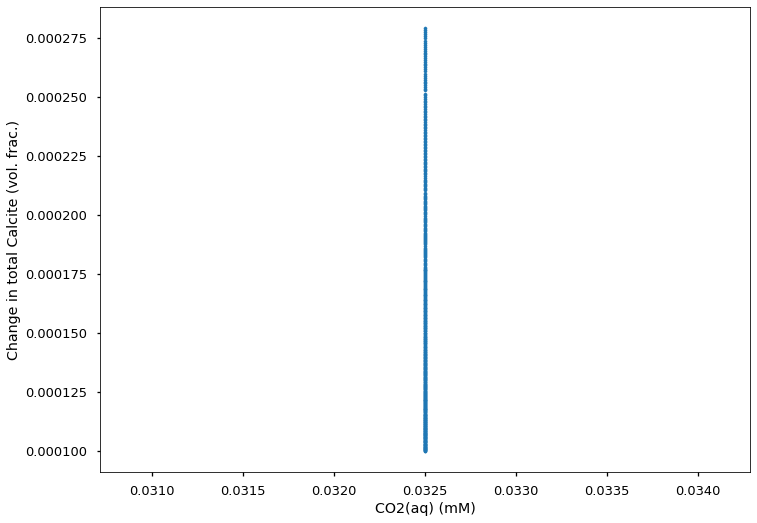

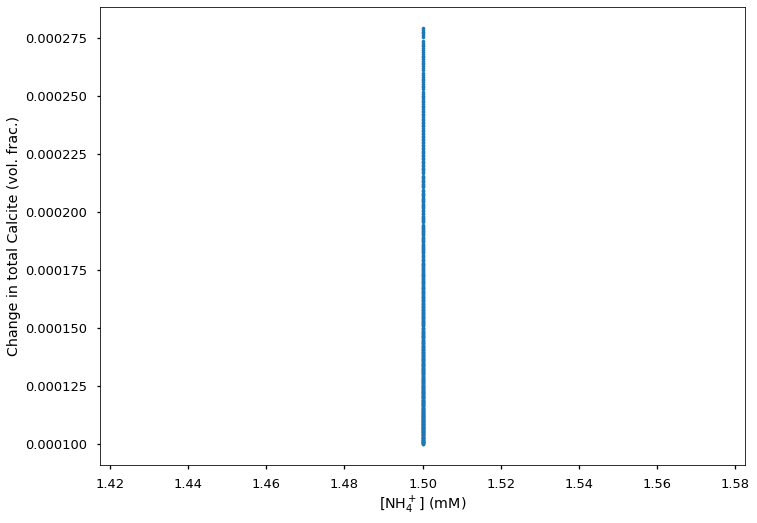

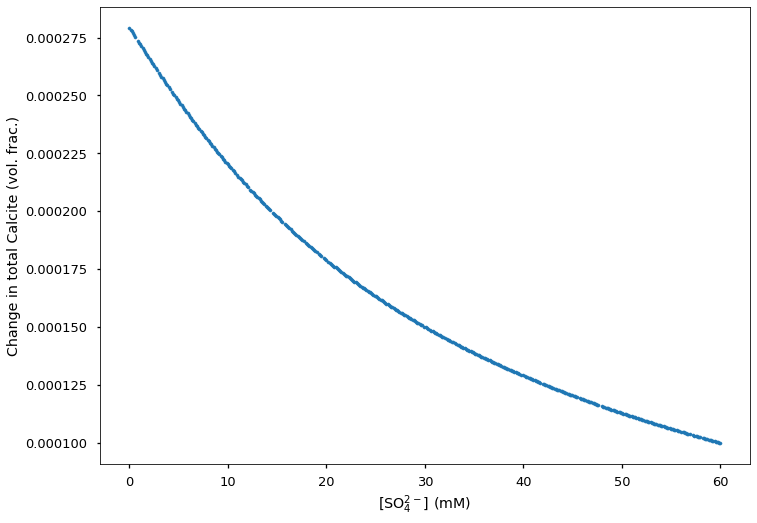

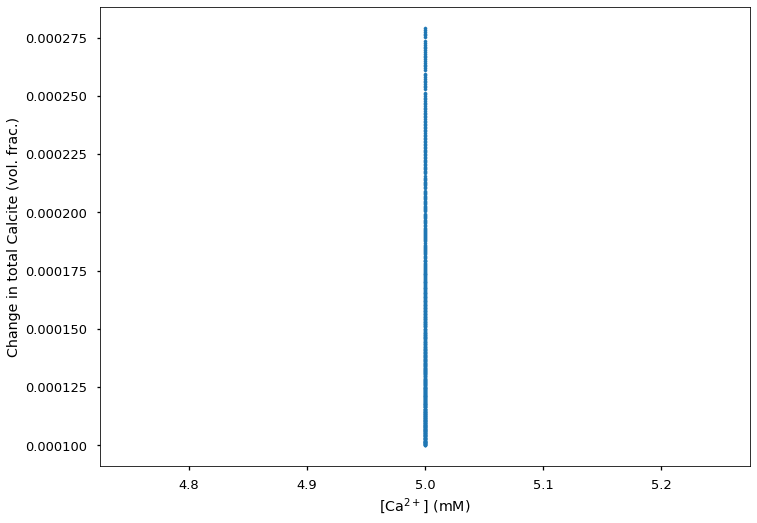

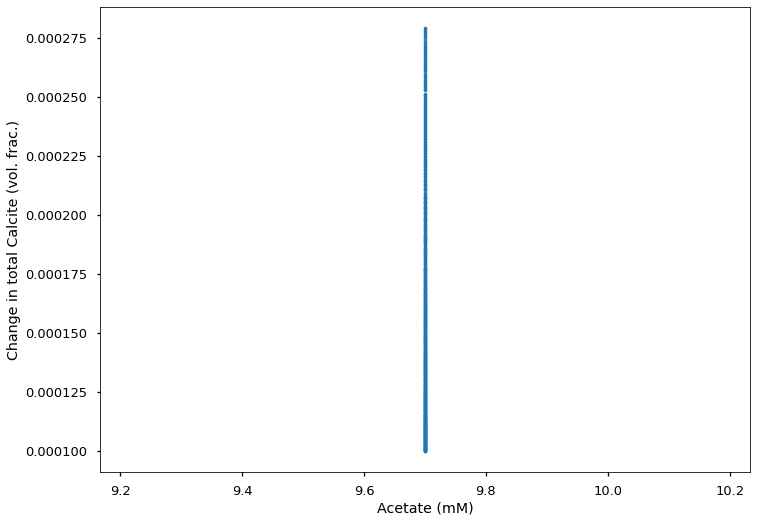

In [9]:
plt.style.use('seaborn-talk')

plot_list = ['CO2(aq)', 'NH4+', 'SO4--', 'Ca++', 'Acetate']
x_labels = ['CO2(aq) (mM)', '[NH$_4^+$] (mM)', '[SO$_4^{2-}$] (mM)', '[Ca$^{2+}$] (mM)', 'Acetate (mM)'] 

for x_label, species in zip(x_labels, plot_list):
    #g = sns.jointplot(x=x_train[species], y=y_train, kind="scatter", marker='o', s=15, height=10)
    fig, ax = plt.subplots(1, 1, constrained_layout=True)
    ax.scatter(x_train[species], y_train, s=10)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel('Change in total Calcite (vol. frac.)')
    
    fig.savefig('figures/scatter_{}'.format(species))

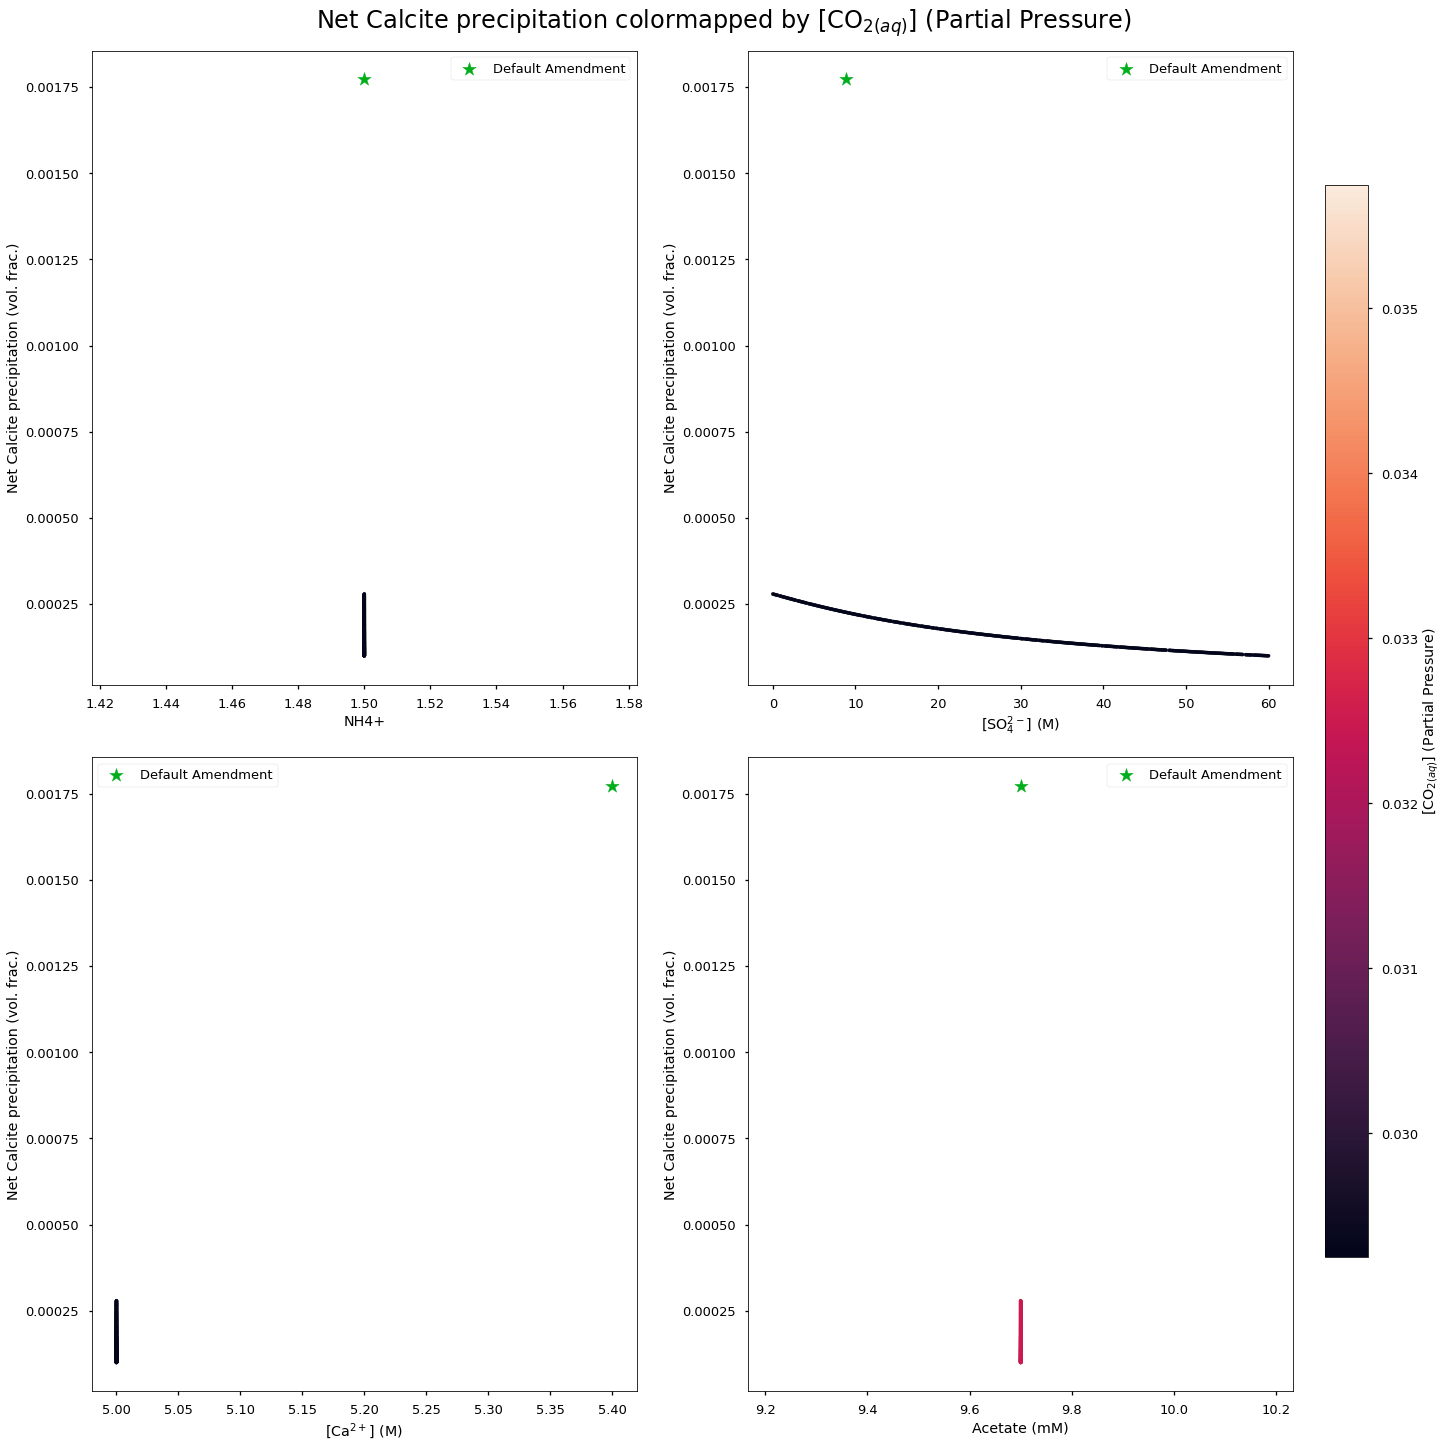

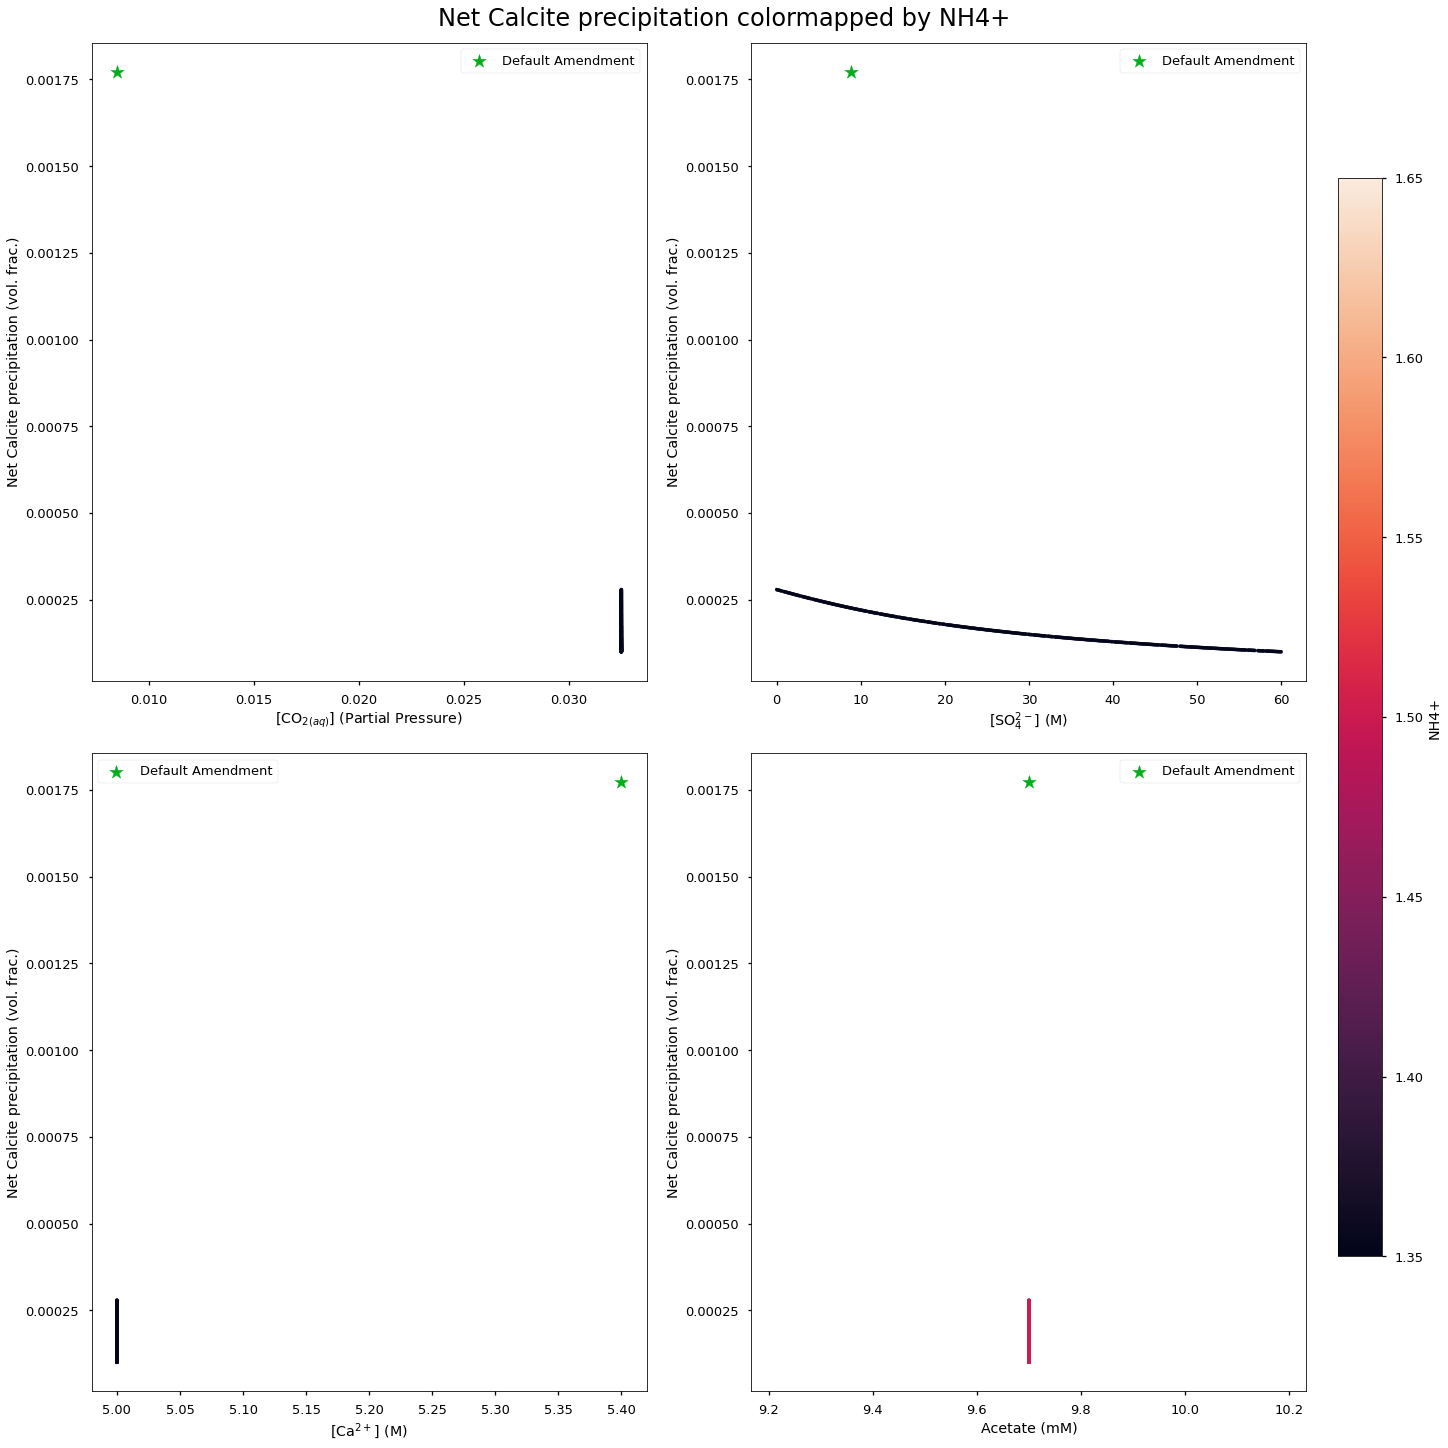

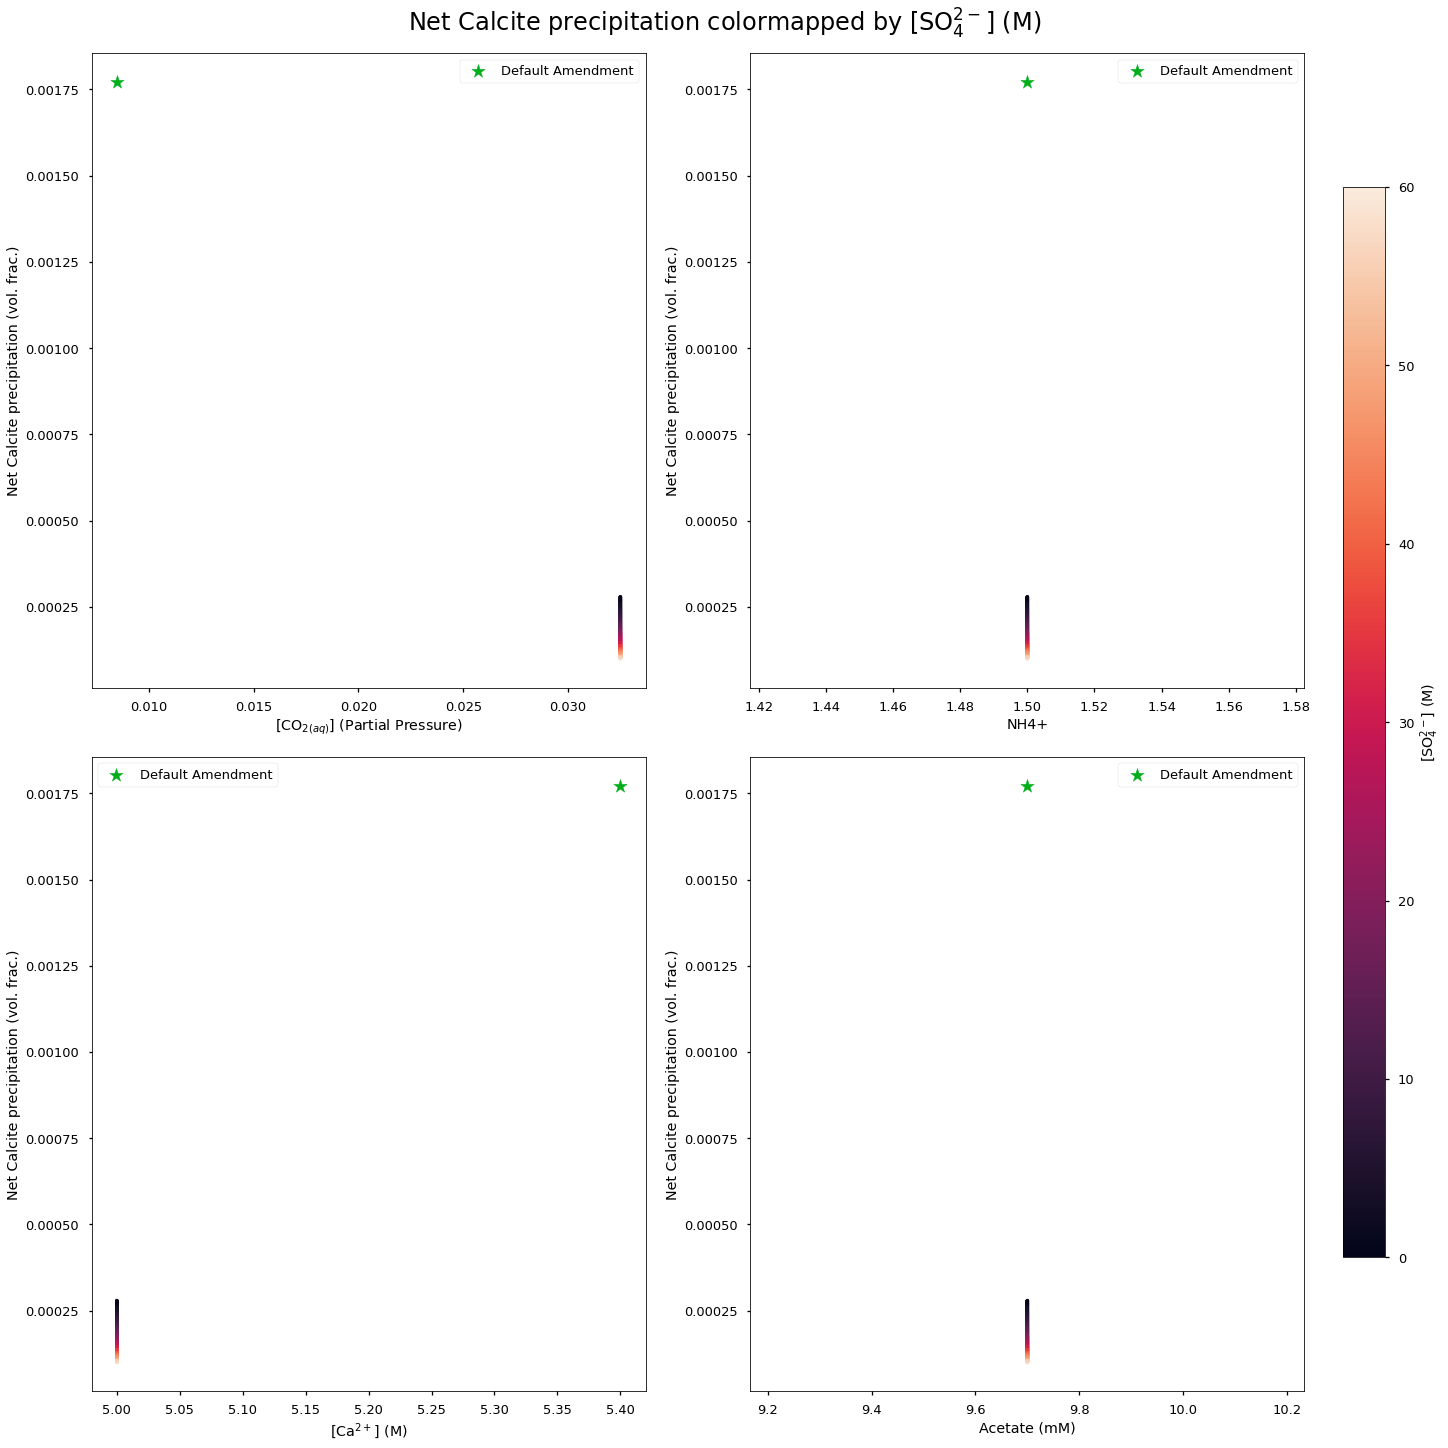

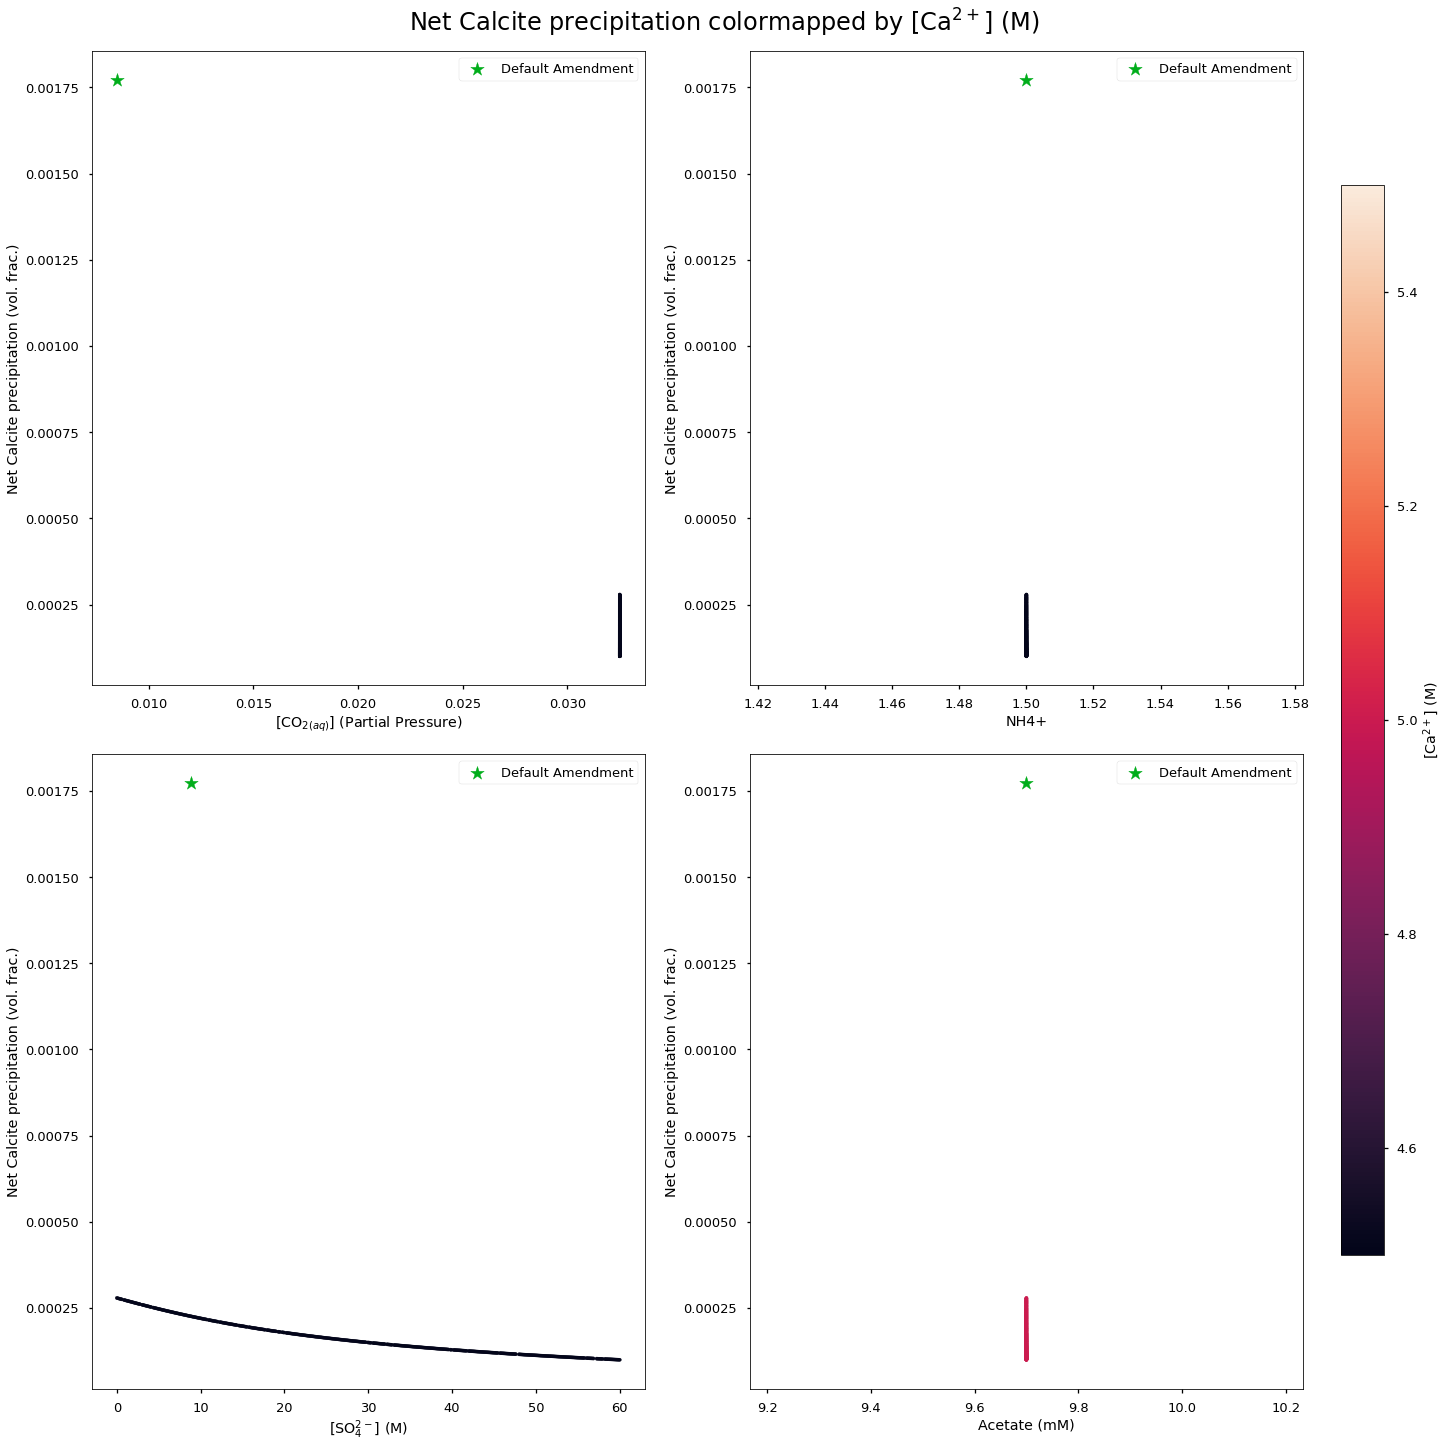

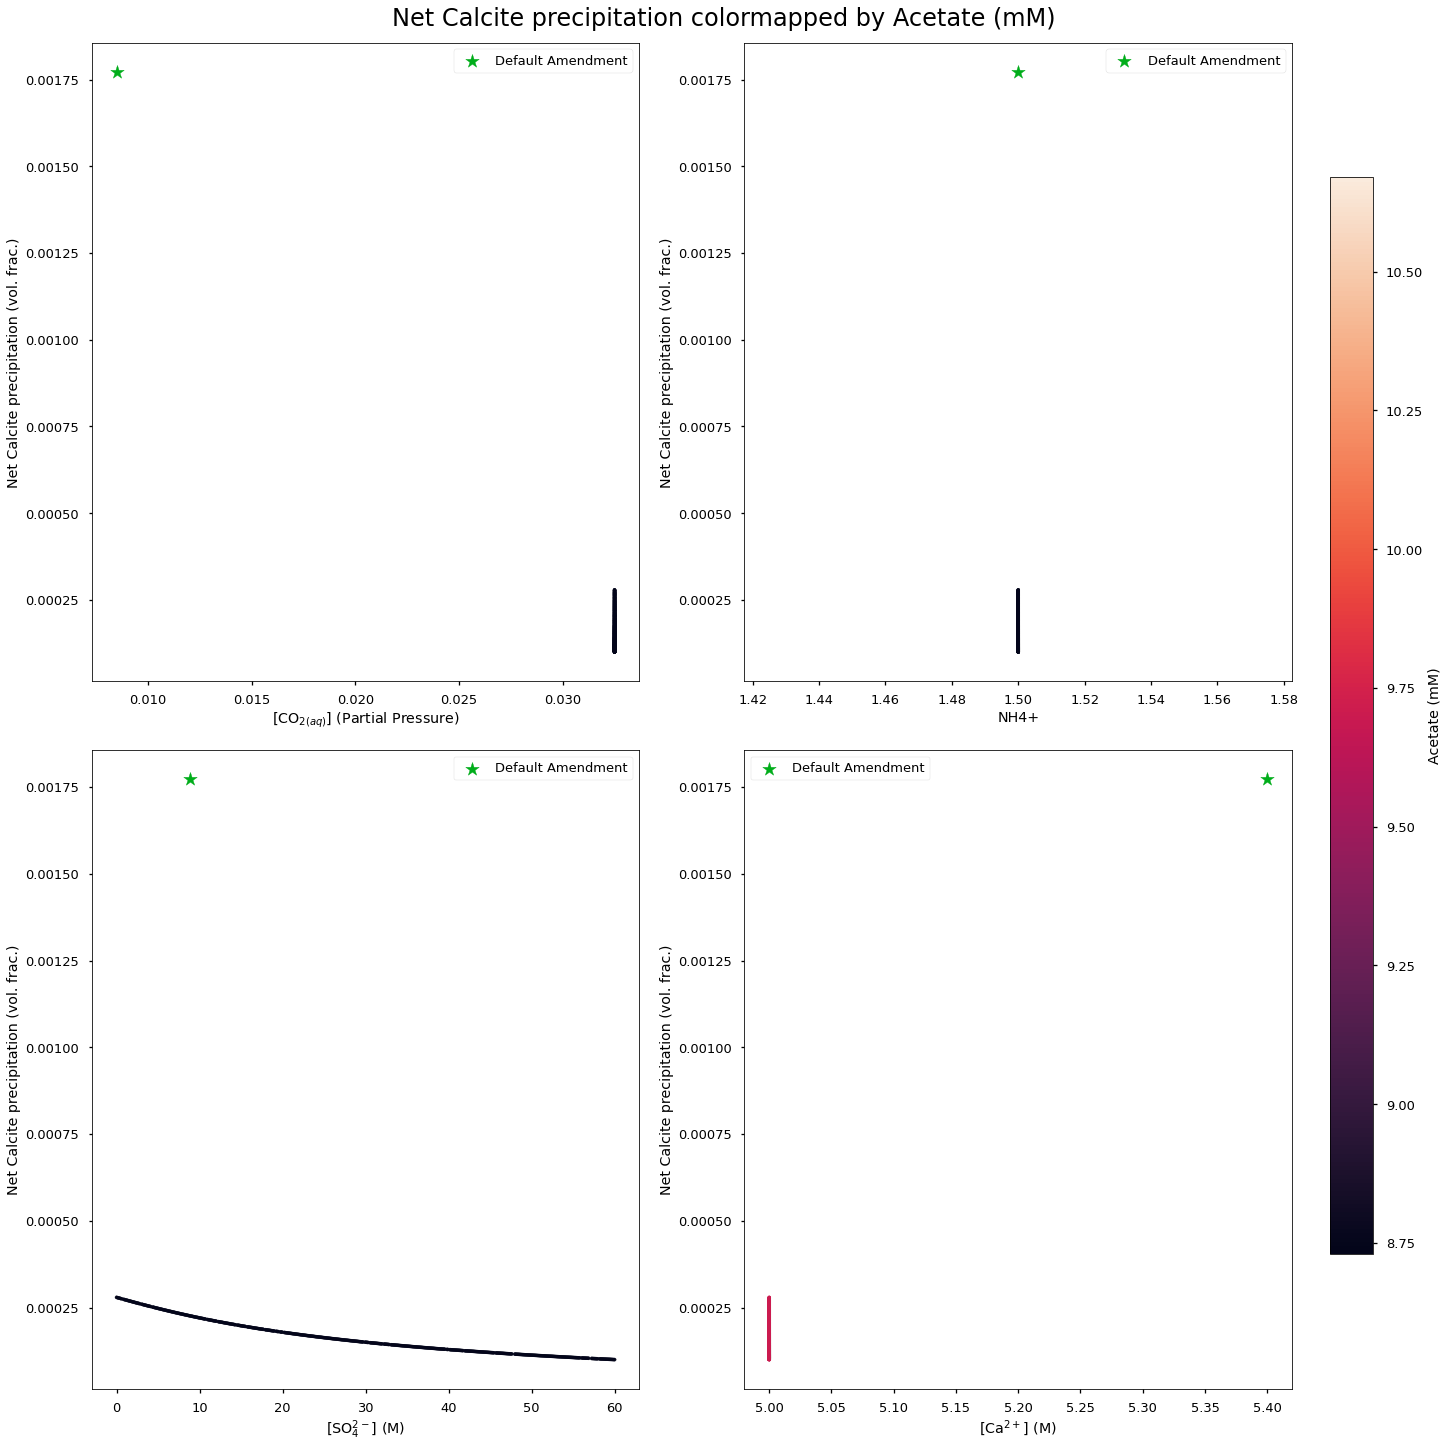

In [10]:
plt.style.use('seaborn-talk')
for i, cmap_var in enumerate(['CO2(aq)', 'NH4+', 'SO4--', 'Ca++', 'Acetate']):
    
    plot_list = ['CO2(aq)', 'NH4+', 'SO4--', 'Ca++', 'Acetate']
    x_labels = ['[CO$_{2(aq)}$] (Partial Pressure)',  'NH4+', '[SO$_4^{2-}$] (M)', '[Ca$^{2+}$] (M)', 'Acetate (mM)']
    
    default_vals=[8.4726e-3, 1.5, 8.80, 5.4, 9.70]
    default_precip = 1.7721888E-03

    plot_list.pop(i)
    default_vals.pop(i)
    cmap_label = x_labels.pop(i)
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 20), constrained_layout=True)
    for x_label, species, default, axis in zip(x_labels, plot_list, default_vals, ax.reshape(-1)):
        im = axis.scatter(x=x_train[species], y=y_train, c=x_train[cmap_var], cmap='rocket', s=10)
        axis.set_xlabel(x_label)
        axis.set_ylabel('Net Calcite precipitation (vol. frac.)')
        axis.scatter(default, default_precip, marker='*', c='#00ad1a', s=200,label='Default Amendment')
        axis.legend()

    cbar = fig.colorbar(im, ax=ax[:,1], shrink=0.8)
    cbar.set_label(cmap_label)
    fig.suptitle('Net Calcite precipitation colormapped by {}'.format(cmap_label), fontsize=24)
    fig.savefig('figures/shaded_scatter_{}'.format(cmap_var))